In [1]:
import psycopg2
import pandas as pd
import numpy as np

conn_string = 
conn = psycopg2.connect(conn_string)
cur=conn.cursor()

cur.execute("select * from readmission.icu_admissions_text;")
result = cur.fetchall()

In [2]:
columns = ["row_id","subject_id","hadm_id","intime","outtime","information","readmission"]
df = pd.DataFrame(result,columns = columns)
df

,row_id,subject_id,hadm_id,intime,outtime,information,readmission
0,50106,72094,101151,2114-05-04 13:29:49,2114-05-05 16:25:29,[**2114-5-4**] 4:22 PM\n CHEST (PORTABLE AP) ...,0
1,29425,24089,101153,2129-04-22 16:34:00,2129-04-24 14:58:00,[**2129-4-21**] 4:25 AM\n CHEST (PA & LAT) ...,0
2,36026,29543,101157,2128-04-20 21:28:29,2128-04-25 16:57:37,Resp Care\nPt received intubated with 7 ett @ ...,0
3,35735,29311,101160,2108-12-13 14:33:13,2108-12-18 00:13:01,[**2108-12-16**] 6:27 PM\n CHEST PORT. LINE PL...,0
4,3011,2482,101161,2153-02-09 04:42:02,2153-02-19 19:45:31,[**2153-1-23**] 8:41 AM\n CTA CHEST W&W/O C &R...,0
...,...,...,...,...,...,...,...
45937,41118,44310,101142,2124-04-06 12:12:16,2124-04-07 22:01:52,[**2124-4-7**] 7:21 AM\n CHEST (PORTABLE AP) ...,0
45938,28995,23734,101143,2123-11-15 20:30:35,2123-11-16 19:15:07,[**2123-11-15**] 4:23 PM\n CHEST (PORTABLE AP)...,0
45939,46137,59618,101145,2102-01-20 20:39:57,2102-01-21 20:33:19,[**2102-1-21**] 9:12 AM\n CHEST (PORTABLE AP) ...,0
45940,12023,9828,101146,2200-01-23 22:47:16,2200-01-26 13:39:54,[**2200-1-23**] 7:56 PM\n CHEST (PORTABLE AP) ...,0


In [3]:
text_1 = []
text_0 = []

for i in range(45942):
    if df["readmission"][i] == 1:
        text_1.append(df["information"][i])
    else:
        text_0.append(df["information"][i])
  
# text_1 = np.array(text_1)
# text_0 = np.array(text_0)

In [4]:
text_1.sort(key= lambda x:len(x))
text_0.sort(key= lambda x:len(x))

In [5]:
# for i in range(100):
#     print(len(text_1[i]))

In [6]:
#중앙값 기준으로 배열 출력
def middle(text_1,text_0):
    mid_sort_1 = []
    mid_sort_0 = []

    mid_sort_1.append(text_1[675])
    mid_sort_0.append(text_0[22285])

    for i in range(674):
        mid_sort_1.append(text_1[674-i])
        mid_sort_1.append(text_1[676+i])
    mid_sort_1.append(text_1[0])

    for i in range(22284):
        mid_sort_0.append(text_0[22284-i])
        mid_sort_0.append(text_0[22286+i])
    mid_sort_0.append(text_0[0])

    for j in range(22):
        mid_sort_0 .append(text_0[44592-(22-j)])
    
    
    
    return mid_sort_1,mid_sort_0

#1000개만 뽑았을 때
def result(mid_sort,num):
    input = np.array([])
    for i in range(num):
        input = np.append(input,mid_sort[i])

    return input

In [7]:
mid_sort_1 = np.array([])
mid_sort_0 = np.array([])
mid_sort_1,mid_sort_0 = middle(text_1,text_0)

print(mid_sort_1)
print(len(mid_sort_1))
print(mid_sort_0)
print(len(mid_sort_0))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
input_1 = np.array([])
input_1 = result(mid_sort_1,1000)

print(input_1)

["[**2122-12-28**] 10:57 AM\n CHEST (PA & LAT)                                                Clip # [**Clip Number (Radiology) 2802**]\n Reason: ? lung lesions?\n ______________________________________________________________________________\n [**Hospital 2**] MEDICAL CONDITION:\n  83 year old man with hypoxia, newly dx'd bone cancer, has SOB\n REASON FOR THIS EXAMINATION:\n  ? lung lesions?\n ______________________________________________________________________________\n                                 FINAL REPORT\n INDICATION:  83-year-old male with hypoxia and newly diagnosed lung cancer.\n\n COMPARISON:  None available.\n\n TECHNIQUE:  PA and lateral chest radiograph.\n\n FINDINGS:  There is dense opacification of the left lower lung zone with upper\n lobe collapse and central adenopathy. There is rightward deviation of trachea.\n Large left pleural effusion is observed with a lower lung zone mass presumed.\n The right lung is unremarkable.  There is no pneumothorax. The most of

In [9]:
# for i in range(1000):
#     print(len(input_1[i]))

In [44]:
input_0 = np.array([])
input_0 = result(mid_sort_0,10000)

print(input_0)

['[**2133-8-16**] 9:03 PM\n CHEST (PORTABLE AP)                                             Clip # [**Clip Number (Radiology) 87833**]\n Reason: Any acute cardiopulmonary process?\n Admitting Diagnosis: ASPIRIN DESENSITIZATION\n ______________________________________________________________________________\n [**Hospital 3**] MEDICAL CONDITION:\n  80 year old woman with CP and DOE admitted for aspirin desensitization prior to\n  cardiac cath. 90-94% on RA without known lung disease.\n REASON FOR THIS EXAMINATION:\n  Any acute cardiopulmonary process?\n ______________________________________________________________________________\n WET READ: IPf MON [**2133-8-17**] 5:49 AM\n  Low lung volumes. Possible mild pulmonary edema. However, suboptimal\n  radiogarph. Repeat radiograph in full inspiration is recommended.\n ______________________________________________________________________________\n                                 FINAL REPORT\n HISTORY:  Chest pain and dyspnea on exertion.\n\

In [11]:
'''정규 표현식으로 토큰화'''
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download("punkt")

stopwords = stopwords.words('english')
print(stopwords)

def stop_words(word_tokens):
    #global stopwords
    #stopwords = stopwords.words('english') 
    remove_words = ['name', 'report', 'number','thi','examin','admit','date','day','year','size','histori']
    result = []
    for word in word_tokens:
        if word not in remove_words:
            result.append(word)
    
    return result

'''어간 추출 ex) beginning = begin'''
def porter(tokens):
    stemmer = PorterStemmer()
    new_tokens = []
    for word in tokens:
        tmp = stemmer.stem(word)
        new_tokens.append(tmp)
            
    return new_tokens

def normalize_text(text):
    tokenizer = RegexpTokenizer("[a-zA-Z]{3,}")
    tokens = tokenizer.tokenize(text)
    new_tokens = []
    for word in tokens:
        if word not in stopwords:
            new_tokens.append(word)
            
    # 정규화 마무리 작업
    normalize_tokens = porter(new_tokens)

    return normalize_tokens

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ehdus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ehdus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## WordCloud (=Tag Cloud)

- 태그 분석하여 중요도나 인기도등을 고려하여 시각적으로 늘어놓아 표시한 것으로 2차원의 표와 같은 형태로 태그들이 배치되는 맵이다
- 시각적인 중요도를 강조하기 위해 각 태그들을 그 중요도에 따라 글자의 색상이나 굵기등 반영되어 표현된다

In [45]:
ok_read_group = []
no_read_group = []
for idx in range(len(input_1)):
    ok_tmp = input_1[idx]
    ok_read_group.append(normalize_text(ok_tmp))

for idx in range(len(input_0)):
    no_tmp = input_0[idx]
    no_read_group.append(normalize_text(no_tmp))

In [13]:
# no_tmp = df.iloc[3]['information']
# a=[]
# a.append(normalize_text(no_tmp))

In [14]:
re_o = []
for idx in range(len(ok_read_group)):
    re_o.append(nltk.pos_tag(ok_read_group[idx]))
    
print(re_o[:10])

[[('chest', 'JJS'), ('lat', 'JJ'), ('clip', 'NN'), ('clip', 'NN'), ('number', 'NN'), ('radiolog', 'NN'), ('reason', 'NN'), ('lung', 'NN'), ('lesion', 'NN'), ('hospit', 'NN'), ('medic', 'NN'), ('condit', 'NN'), ('year', 'NN'), ('old', 'JJ'), ('man', 'NN'), ('hypoxia', 'NN'), ('newli', 'JJ'), ('bone', 'NN'), ('cancer', 'NN'), ('sob', 'VBZ'), ('reason', 'NN'), ('for', 'IN'), ('thi', 'NN'), ('examin', 'NN'), ('lung', 'NN'), ('lesion', 'NN'), ('final', 'JJ'), ('report', 'NN'), ('indic', 'JJ'), ('year', 'NN'), ('old', 'JJ'), ('male', 'NN'), ('hypoxia', 'NN'), ('newli', 'JJ'), ('diagnos', 'NN'), ('lung', 'NN'), ('cancer', 'NN'), ('comparison', 'NN'), ('none', 'NN'), ('avail', 'NN'), ('techniqu', 'NN'), ('later', 'RB'), ('chest', 'JJS'), ('radiograph', 'NN'), ('find', 'VBP'), ('there', 'EX'), ('dens', 'VBZ'), ('opacif', 'NN'), ('left', 'VBD'), ('lower', 'JJR'), ('lung', 'NN'), ('zone', 'CD'), ('upper', 'JJ'), ('lobe', 'NN'), ('collaps', 'NNS'), ('central', 'JJ'), ('adenopathi', 'IN'), ('there'

In [46]:
re_n = []
for idx in range(len(no_read_group)):
    re_n.append(nltk.pos_tag(no_read_group[idx]))

print(re_n[:10])

[[('chest', 'NN'), ('portabl', 'NN'), ('clip', 'NN'), ('clip', 'NN'), ('number', 'NN'), ('radiolog', 'NN'), ('reason', 'NN'), ('ani', 'JJ'), ('acut', 'NN'), ('cardiopulmonari', 'NN'), ('process', 'NN'), ('admit', 'NN'), ('diagnosi', 'NN'), ('aspirin', 'IN'), ('desensit', 'NN'), ('hospit', 'NN'), ('medic', 'NN'), ('condit', 'NN'), ('year', 'NN'), ('old', 'JJ'), ('woman', 'NN'), ('doe', 'VBZ'), ('admit', 'VBP'), ('aspirin', 'IN'), ('desensit', 'NN'), ('prior', 'JJ'), ('cardiac', 'JJ'), ('cath', 'NN'), ('without', 'IN'), ('known', 'VBN'), ('lung', 'NN'), ('diseas', 'NNS'), ('reason', 'NN'), ('for', 'IN'), ('thi', 'NN'), ('examin', 'NN'), ('ani', 'NN'), ('acut', 'VBD'), ('cardiopulmonari', 'JJ'), ('process', 'NN'), ('wet', 'NN'), ('read', 'VBD'), ('ipf', 'JJ'), ('mon', 'RB'), ('low', 'JJ'), ('lung', 'NN'), ('volum', 'NN'), ('possibl', 'NN'), ('mild', 'NN'), ('pulmonari', 'NN'), ('edema', 'NN'), ('howev', 'NN'), ('suboptim', 'NN'), ('radiogarph', 'NN'), ('repeat', 'NN'), ('radiograph', 'VBP

In [16]:
#  NN은 명사, NNS는 단수형 명사,NNP는 고유 명사, NNS는 복수형 명사
ok_words = []
for row in re_o:
    for word,pos in row:
        if pos=='NN' or pos=='NNS' or pos=='NNP' or pos=='NNPS':
            ok_words.append(word)

In [47]:
no_words = []
for row in re_n:
    for word,pos in row:
        if pos=='NN' or pos=='NNS' or pos=='NNP' or pos=='NNPS':
            no_words.append(word)

In [18]:
from collections import Counter

count_ok = Counter(ok_words)
count_no = Counter(no_words)

print(count_ok.most_common(100))
print('--------------------------------------------------')
print(count_no.most_common(100))

[('reason', 2062), ('clip', 1981), ('year', 1246), ('report', 1118), ('radiolog', 1061), ('number', 1050), ('thi', 1037), ('examin', 993), ('name', 940), ('chest', 932), ('hospit', 893), ('condit', 891), ('contrast', 885), ('medic', 792), ('effus', 690), ('portabl', 681), ('admit', 680), ('tube', 662), ('man', 634), ('comparison', 610), ('impress', 596), ('diagnosi', 582), ('line', 576), ('lung', 543), ('placement', 541), ('chang', 510), ('pleas', 458), ('woman', 455), ('lobe', 421), ('post', 418), ('pulmonari', 385), ('bilater', 381), ('identifi', 356), ('tip', 353), ('patient', 347), ('posit', 345), ('cathet', 341), ('pneumothorax', 336), ('abdomen', 333), ('evalu', 327), ('vein', 315), ('note', 309), ('place', 308), ('pneumonia', 300), ('radiograph', 298), ('edema', 297), ('imag', 286), ('procedur', 285), ('view', 284), ('heart', 282), ('statu', 282), ('interv', 277), ('arteri', 271), ('head', 264), ('fluid', 256), ('hemorrhag', 244), ('studi', 242), ('limit', 241), ('air', 241), ('

In [19]:
ok_result = stop_words(ok_words)
ok_result

['clip',
 'clip',
 'radiolog',
 'reason',
 'lung',
 'lesion',
 'hospit',
 'medic',
 'condit',
 'man',
 'hypoxia',
 'bone',
 'cancer',
 'reason',
 'lung',
 'lesion',
 'male',
 'hypoxia',
 'diagnos',
 'lung',
 'cancer',
 'comparison',
 'none',
 'avail',
 'techniqu',
 'radiograph',
 'opacif',
 'lung',
 'lobe',
 'collaps',
 'deviat',
 'trachea',
 'larg',
 'effus',
 'observ',
 'lung',
 'mass',
 'right',
 'lung',
 'unremark',
 'border',
 'obscur',
 'lung',
 'opac',
 'impress',
 'larg',
 'effus',
 'lobe',
 'collaps',
 'adenopathi',
 'mass',
 'presum',
 'stitl',
 'phone',
 'chest',
 'portabl',
 'clip',
 'clip',
 'radiolog',
 'reason',
 'placement',
 'hospit',
 'medic',
 'condit',
 'woman',
 'breast',
 'subdur',
 'placement',
 'reason',
 'picc',
 'placement',
 'portabl',
 'chest',
 'comparison',
 'film',
 'place',
 'tip',
 'svc',
 'mediastin',
 'contour',
 'grossli',
 'differ',
 'techniqu',
 'patient',
 'patient',
 'inspiratori',
 'effort',
 'note',
 'definit',
 'acut',
 'process',
 'lung',
 'c

In [20]:
from collections import Counter

count_ok = Counter(ok_result)

print(count_ok.most_common(100))

[('reason', 2062), ('clip', 1981), ('radiolog', 1061), ('chest', 932), ('hospit', 893), ('condit', 891), ('contrast', 885), ('medic', 792), ('effus', 690), ('portabl', 681), ('tube', 662), ('man', 634), ('comparison', 610), ('impress', 596), ('diagnosi', 582), ('line', 576), ('lung', 543), ('placement', 541), ('chang', 510), ('pleas', 458), ('woman', 455), ('lobe', 421), ('post', 418), ('pulmonari', 385), ('bilater', 381), ('identifi', 356), ('tip', 353), ('patient', 347), ('posit', 345), ('cathet', 341), ('pneumothorax', 336), ('abdomen', 333), ('evalu', 327), ('vein', 315), ('note', 309), ('place', 308), ('pneumonia', 300), ('radiograph', 298), ('edema', 297), ('imag', 286), ('procedur', 285), ('view', 284), ('heart', 282), ('statu', 282), ('interv', 277), ('arteri', 271), ('head', 264), ('fluid', 256), ('hemorrhag', 244), ('studi', 242), ('limit', 241), ('air', 241), ('atelectasi', 241), ('mass', 240), ('base', 227), ('opac', 213), ('liver', 210), ('techniqu', 207), ('picc', 199), (

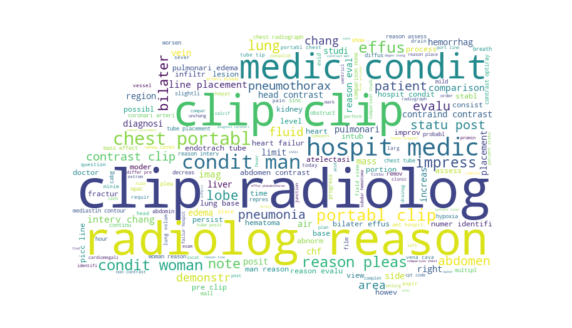

In [21]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

icon = np.array(Image.open('image.png'))
noun_text = ''
for word in ok_result:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=200,background_color="white",mask = icon,relative_scaling=.5).generate(noun_text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("result_1.png")

In [48]:
not_use = []
not_use.append("")

In [49]:
no_result = stop_words(no_words)
no_result

['chest',
 'portabl',
 'clip',
 'clip',
 'radiolog',
 'reason',
 'acut',
 'cardiopulmonari',
 'process',
 'diagnosi',
 'desensit',
 'hospit',
 'medic',
 'condit',
 'woman',
 'desensit',
 'cath',
 'lung',
 'diseas',
 'reason',
 'ani',
 'process',
 'wet',
 'lung',
 'volum',
 'possibl',
 'mild',
 'pulmonari',
 'edema',
 'howev',
 'suboptim',
 'radiogarph',
 'repeat',
 'inspir',
 'pain',
 'dyspnea',
 'comparison',
 'studi',
 'lung',
 'volum',
 'accentu',
 'promin',
 'transvers',
 'heart',
 'indistinct',
 'consist',
 'elev',
 'pulmonari',
 'venou',
 'pressur',
 'portabl',
 'chest',
 'portabl',
 'clip',
 'clip',
 'radiolog',
 'reason',
 'placement',
 'stroke',
 'telemetri',
 'telemetri',
 'telemetri',
 'hospit',
 'medic',
 'condit',
 'man',
 'right',
 'mca',
 'reason',
 'stroke',
 'intub',
 'check',
 'tube',
 'placement',
 'impress',
 'chest',
 'review',
 'chest',
 'radiograph',
 'placement',
 'line',
 'tip',
 'project',
 'mid',
 'svc',
 'mediastinum',
 'abnorm',
 'suggest',
 'abnorm',
 'per

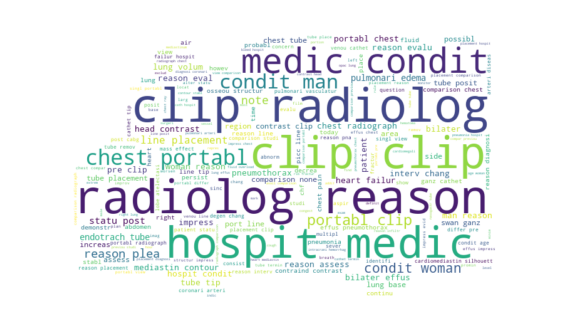

In [42]:
noun_text1 = ''
for word in no_result:
    noun_text1 = noun_text1 +' '+word
    
wordcloud = WordCloud(max_font_size=200,background_color="white",mask = icon,relative_scaling=.5).generate(noun_text1)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("result_0_5000.png")

In [25]:
# 1000:1000
def jaccard_similarity(val1, val2): 
    doc1, doc2 = set(val1), set(val2) 
    return float(len(doc1.intersection(doc2)) / len(doc1.union(doc2)))

jaccard = jaccard_similarity(ok_result, no_result)
print(jaccard)

0.4664072101597706


In [43]:
# 1000: 5000
def jaccard_similarity(val1, val2): 
    doc1, doc2 = set(val1), set(val2) 
    return float(len(doc1.intersection(doc2)) / len(doc1.union(doc2)))

jaccard = jaccard_similarity(ok_result, no_result)
print(jaccard)

0.4098860323350119


In [50]:
# 1000: 100000
def jaccard_similarity(val1, val2): 
    doc1, doc2 = set(val1), set(val2) 
    return float(len(doc1.intersection(doc2)) / len(doc1.union(doc2)))

jaccard = jaccard_similarity(ok_result, no_result)
print(jaccard)

0.34021461420541643
